In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from tqdm.autonotebook import tqdm

C:\Users\Sina Roshandell\AppData\Local\Temp\ipykernel_10864\3469785724.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [6]:
w

In [7]:
# #pdf

# def PDF(data,nbins):

#   maxi = np.max(data)
#   mini = np.min(data)

#   dx = (max(data) - min(data))/(nbins)

#   pdf = np.zeros(nbins)
#   axes = np.linspace(mini,maxi,nbins)
#   Data = data - mini
#   for i in range(len(data)):
#     R = int(Data[i]/dx)
#     pdf[R] += 1

#   pdf = pdf / (np.sum(pdf)*dx)

#   return pdf,axes

# #joint pdf

# def jpdf(x,y,nbins):
#   minx=np.min(x)
#   maxx=np.max(x)
#   miny=np.min(y)
#   maxy=np.max(y)
#   dx = (max(x) - min(x))/(nbins)
#   dy = (max(y) - min(y))/(nbins)

#   pdf = np.zeros((nbins,nbins))
#   axesx = np.linspace(minx,maxx,nbins)
#   axesy = np.linspace(miny,maxy,nbins)
#   Datax = x - minx
#   Datay = y - miny
#   for i in range(len(x)):
#     Rx = int(Datax[i]/dx)
#     Ry = int(Datay[i]/dy)
#     pdf[Rx,Ry] += 1

#   pdf = pdf / (np.sum(pdf)*dx*dy)
#   return axesx,axesy,pdf

# def jpdfc(x,y,nbins):
#   axx,axy,pxy=jpdf(x,y,nbins)
#   py,ax=PDF(y,nbins)

#   # print(py)
#   dx = (max(x) - min(x))/(nbins)
#   dy = (max(y) - min(y))/(nbins)
#   py=py*dy
#   pxy=pxy*dx*dy
#   fs=np.zeros((pxy.shape[0],pxy.shape[1]))
#   for x2 in range(len(py)):
#     if py[x2]==0:
#       #print(fs[:,x2])
#       fs[:,x2]=np.nan
#     else:
#       # print(fs[:,x2],py[x2])
#       fs[:,x2]=pxy[:,x2]/(py[x2])

#   return fs
# def cktest(y,nbins):
#     taus=np.arange(0,5,1)
#     dt=[]
#     for tau in taus:
#         xx1=y[:-200]
#         xx2=y[tau:-200+tau]
#         xx3=y[2*tau:-200+2*tau]
#         dx1 = (max(xx1) - min(xx1))/(nbins)
#         dx2 = (max(xx2) - min(xx2))/(nbins)
#         dx3 = (max(xx3) - min(xx3))/(nbins)
#         #print(dx1,dx2,dx3)
#         pc1=jpdfc(xx3,xx2,nbins)
#         #print(np.sum(pc1,axis=0))
#         #pc1 = pc1[~np.isnan(pc1)]
#         pc2=jpdfc(xx2,xx1,nbins)
#         # pc2 = pc2[~np.isnan(pc2)]
#         pcs=jpdfc(xx3,xx1,nbins)
#         # pcs = pcs[~np.isnan(pcs)]
#         # pcs=np.nansum(pcs,axis=1)*dx1
#         dt.append(np.abs(np.nansum(pcs-(pc1@pc2))))
#     return taus,dt


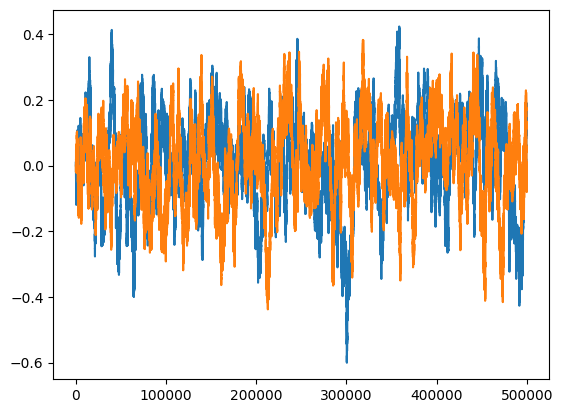

In [8]:
plt.plot(y1)
plt.plot(y2)

In [9]:
def pdf2(x,bins):
  bins,cols=np.histogram(x,bins,density=True)
  axes=(cols[1:]+cols[:-1])/2
  return bins,axes

def jpdf2(x,y,bins):
  H, xedges, yedges = np.histogram2d(x, y, bins=(bins, bins),density=True)
  xcenters = (xedges[:-1] + xedges[1:]) / 2
  ycenters = (yedges[:-1] + yedges[1:]) / 2
  return xcenters,ycenters,H

def jpdfc2(x,y,nbins):
  axx,axy,pxy=jpdf2(x,y,nbins)
  py,ax=pdf2(y,nbins)
  dx = (max(x) - min(x))/(nbins)
  dy = (max(y) - min(y))/(nbins)
  py=py*dy
  pxy=pxy*dx*dy
  fs=np.zeros((pxy.shape[0],pxy.shape[1]))
  for x2 in range(len(py)):
    if py[x2]==0:
      #print(fs[:,x2])
      fs[:,x2]=np.nan
    else:
      fs[:,x2]=pxy[:,x2]/(py[x2])

  return fs


In [10]:
def cktest2(y,nbins):
    taus=np.arange(1,50,1)
    dt=[]
    for tau in tqdm(taus):
        xx1=y[:-200]
        xx2=y[tau:-200+tau]
        xx3=y[2*tau:-200+2*tau]
        dx1 = (max(xx1) - min(xx1))/(nbins)
        dx2 = (max(xx2) - min(xx2))/(nbins)
        dx3 = (max(xx3) - min(xx3))/(nbins)

        pc1=jpdfc2(xx3,xx2,nbins)
        pc2=jpdfc2(xx2,xx1,nbins)
        pcs=jpdfc2(xx3,xx1,nbins)
        dt.append(np.nansum((((pcs-(pc1@pc2))**2)/(pcs+(pc1@pc2)))))
    return taus,dt

In [11]:
nbins=50
dx = (max(y1) - min(y1))/(nbins)
dy = (max(y2) - min(y2))/(nbins)
_,_,pxy=jpdf2(y1,y2,nbins)
p=jpdfc2(y1,y2,nbins)
py,_=pdf2(y2,nbins)
px,_=pdf2(y1,nbins)

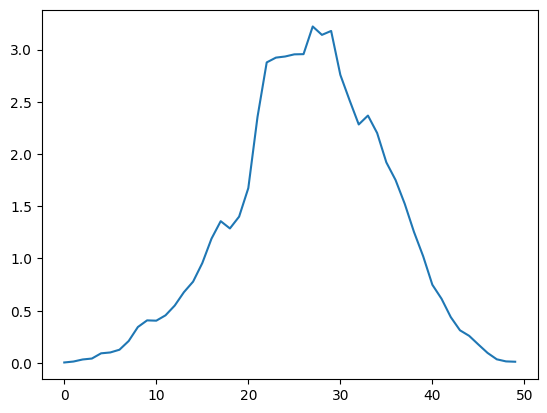

In [13]:
plt.plot(py)

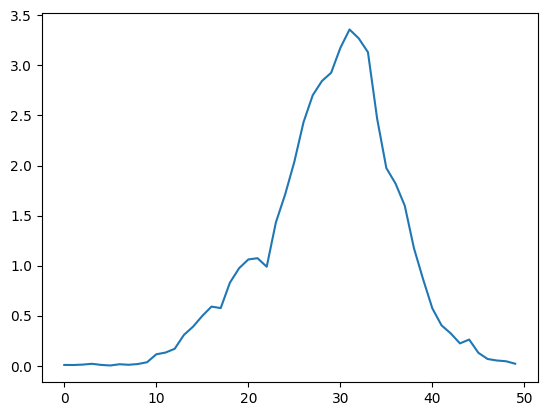

In [12]:
plt.plot(px)

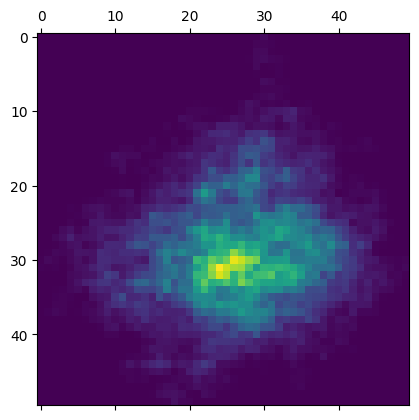

In [14]:
plt.matshow(pxy)

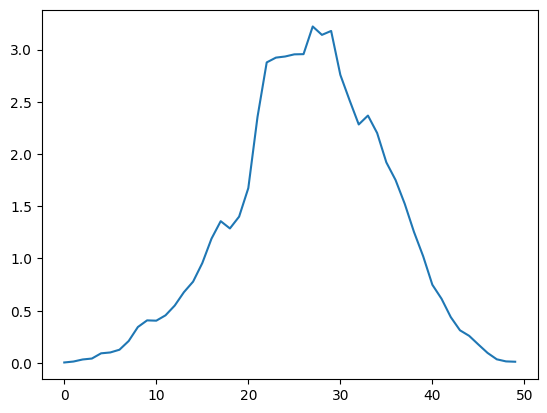

In [15]:
plt.plot(np.sum(pxy,axis=0)*dx)

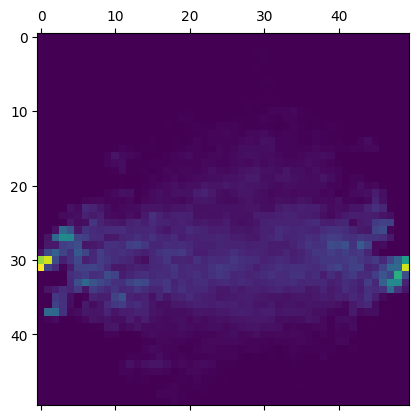

In [17]:
plt.matshow(p)

In [18]:
np.sum(p,axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [20]:
@njit
def acor(data,l):

    cor=[]

    for xl in range(0,l):

        ssum=0

        for x in range(0,len(data)-xl):

            ssum=ssum + data[x+xl] * data[x]

        cor.append(ssum/(len(data)-xl))

    return cor

In [21]:
ccor=acor(y1,5000)

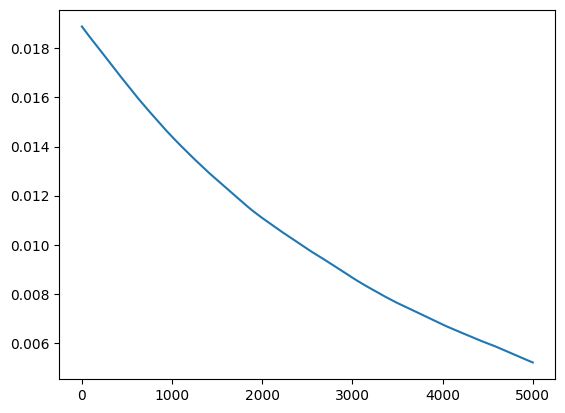

In [22]:
plt.plot(ccor)

In [25]:
t,dt=cktest2(y1,10)

  0%|          | 0/49 [00:00<?, ?it/s]

C:\Users\Sina Roshandell\AppData\Local\Temp\ipykernel_10864\913989871.py:15: RuntimeWarning: invalid value encountered in divide
  dt.append(np.nansum((((pcs-(pc1@pc2))**2)/(pcs+(pc1@pc2)))))


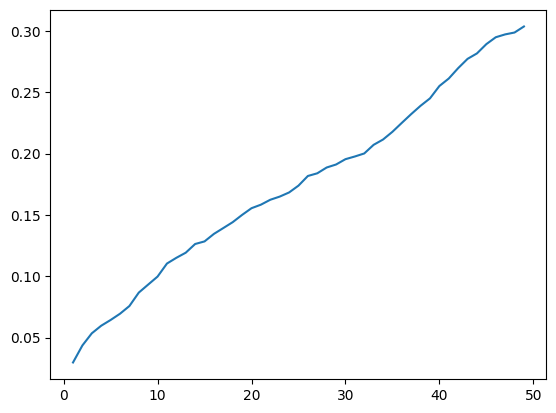

In [26]:
plt.plot(t,dt)